In [1]:
import sys
sys.path.insert(0, '/das/work/p17/p17983/')

In [2]:
%matplotlib nbagg
import jungfrau_utils as ju
import numpy as np
import json
import os
import time
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit

import h5py

from alvra_tools.load_data import *
from alvra_tools.channels import *
from built_functions import *
ploton = True

[INFO][corrections] Numba not available, reverting to Numpy


In [3]:


folder_name_01 = 'XES_RuDimerCl_2842.0eV_600fs'
folder_name_01 = 'XES_2842.0eV_10ps'


red_data_file_01 = '/das/work/p17/p17983/Reduced_data/'+ folder_name_01



RIXS_on_01 = np.load(red_data_file_01+'XES_on.npy')
err_on_01 = np.load(red_data_file_01+'XES_on_err.npy')
RIXS_off_01 = np.load(red_data_file_01+'XES_off.npy')
err_off_01 = np.load(red_data_file_01+'XES_off_err.npy')
RIXS_trans_01 = np.load(red_data_file_01+'XES_trans.npy')
err_trans_01 = np.load(red_data_file_01+'XES_trans_err.npy')


# xAxis = np.linspace(1,RIXS_on_01.shape[1],RIXS_on_01.shape[1])

xAxis = np.linspace(1,len(RIXS_on_01),len(RIXS_on_01))

# xAxis = range(1,len(RIXS_on_01))
print(xAxis)

folder_name_02 = 'XES_2842.0eV_10ps'


red_data_file_02 = '/das/work/p17/p17983/Reduced_data/'+ folder_name_02



RIXS_on_02 = np.load(red_data_file_02+'XES_on.npy')
err_on_02 = np.load(red_data_file_02+'XES_on_err.npy')
RIXS_off_02 = np.load(red_data_file_02+'XES_off.npy')
err_off_02 = np.load(red_data_file_02+'XES_off_err.npy')
RIXS_trans_02 = np.load(red_data_file_02+'XES_trans.npy')
err_trans_02 = np.load(red_data_file_02+'XES_trans_err.npy')
    
    
    

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125. 126.
 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139. 140.
 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153. 154.
 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167. 168.
 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181. 182.
 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195. 196.
 197. 

Run for RIXS

In [4]:
ynCompare12 = 'yes'







In [5]:
# if ynCompare12 == 'yes':

#     folder_name = folder_name_02
#     run_list = run_list_02
#     DIR = "/das/work/p17/p17983/cropped_data/" + folder_name + "/"
#     DIRBS = "/sf/alvra/data/p17983/raw/" + folder_name + "/"

#     iterCounter = 0

#     for ii in run_list:

#         XES_on, XES_off, Energy_eV_pump, Energy_eV_unpump, fluo_pump, fluo_unpump = \
#             get_xes_pumped(filename_base + '%06d' % (ii), DIR, DIRBS, 2, channel_energy, True)

#         if False:

#             plt.figure()
#             plt.subplot(1,2,1)
#             plt.title('ON')
#             plt.imshow(XES_on, vmax = 0.001)
#             plt.colorbar()
#             plt.subplot(1,2,2)
#             plt.title('OFF')
#             plt.imshow(XES_off, vmax = 0.001)
#             plt.colorbar()
#             plt.tight_layout()


#         if iterCounter == 0:
#             rixs_on = XES_on.sum(axis=0)
#             rixs_off = XES_off.sum(axis=0)
#         else:
#             rixs_on = np.vstack((rixs_on,XES_on.sum(axis=0)))
#             rixs_off = np.vstack((rixs_off,XES_off.sum(axis=0)))

#         iterCounter +=1

#     if len(run_list) == 1:
#         RIXS_on_02 = rixs_on
#         RIXS_off_02 = rixs_off
#     else:
#         RIXS_on_02 = rixs_on.sum(axis=0)
#         RIXS_off_02 = rixs_off.sum(axis=0)
        
#     err_on_02 = np.std(rixs_on, axis = 0)/np.sqrt(rixs_on.shape[0]-1)
#     err_off_02 = np.std(rixs_off, axis = 0)/np.sqrt(rixs_off.shape[0]-1)
    

<IPython.core.display.Javascript object>


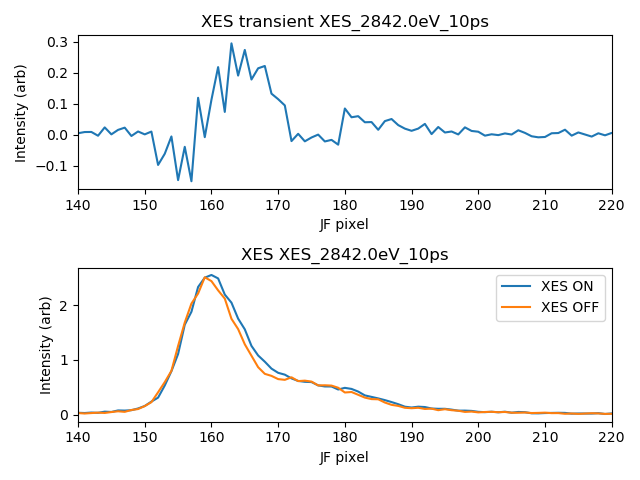

In [6]:
normalize = False



# RIXS_trans_01 = (RIXS_on_01-RIXS_off_01)
# err_trans_01 = err_adder(err_on_01,err_off_01)
# if normalize:
#     RIXS_trans_01 = RIXS_trans_01/RIXS_off_01
#     err_trans_01 = RIXS_trans_01/RIXS_off_01*err_adder(err_trans_01/RIXS_trans_01,err_off_01/RIXS_off_01)

    
xRange_01 = [140,220]

plt.figure()
plt.subplot(2,1,1)
plt.plot(xAxis,RIXS_trans_01)
plt.fill_between(xAxis,RIXS_trans_01+err_trans_01,RIXS_trans_01-err_trans_01,alpha = 0.2)
plt.xlabel('JF pixel')
plt.ylabel('Intensity (arb)')
plt.title('XES transient '+folder_name_01)
plt.xlim(xRange_01)

plt.subplot(2,1,2)
plt.plot(xAxis,RIXS_on_01, label ='XES ON')
plt.fill_between(xAxis,RIXS_on_01+err_on_01,RIXS_on_01-err_on_01, alpha = 0.2)
plt.plot(xAxis,RIXS_off_01, label = 'XES OFF')
plt.fill_between(xAxis,RIXS_off_01+err_off_01,RIXS_off_01-err_off_01, alpha = 0.2)
plt.xlabel('JF pixel')
plt.ylabel('Intensity (arb)')
plt.title('XES ' +folder_name_01)
plt.xlim(xRange_01)
plt.legend()

plt.tight_layout()


<IPython.core.display.Javascript object>


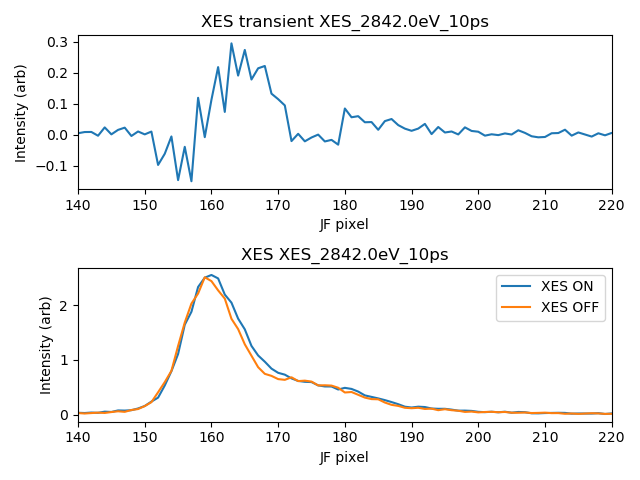

In [7]:
if True:#ynCompare12 == 'yes':
    RIXS_trans_02 = (RIXS_on_02-RIXS_off_02)
    err_trans_02 = err_adder(err_on_02,err_off_02)
    if normalize:
        RIXS_trans_02 = RIXS_trans_02/RIXS_off_02
        err_trans_02 = RIXS_trans_02/RIXS_off_02*err_adder(err_trans_02/RIXS_trans_02,err_off_02/RIXS_off_02)


    xRange_02 = xRange_01

    plt.figure()
    plt.subplot(2,1,1)
    plt.plot(xAxis,RIXS_trans_02)
    plt.fill_between(xAxis,RIXS_trans_02+err_trans_02,RIXS_trans_02-err_trans_02,alpha = 0.2)
    plt.xlabel('JF pixel')
    plt.ylabel('Intensity (arb)')
    plt.title('XES transient '+folder_name_02)
    plt.xlim(xRange_02)

    plt.subplot(2,1,2)
    plt.plot(xAxis,RIXS_on_02, label ='XES ON')
    plt.fill_between(xAxis,RIXS_on_02+err_on_02,RIXS_on_02-err_on_02, alpha = 0.2)
    plt.plot(xAxis,RIXS_off_02, label = 'XES OFF')
    plt.fill_between(xAxis,RIXS_off_02+err_off_02,RIXS_off_02-err_off_02, alpha = 0.2)
    plt.xlabel('JF pixel')
    plt.ylabel('Intensity (arb)')
    plt.title('XES ' +folder_name_02)
    plt.xlim(xRange_02)
    plt.legend()

    plt.tight_layout()

<IPython.core.display.Javascript object>


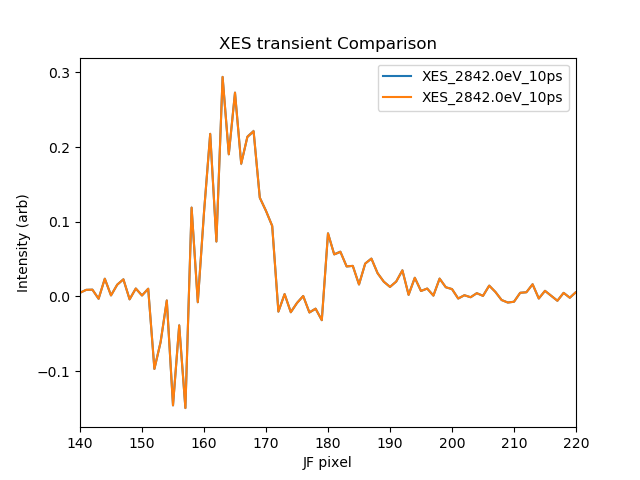

<IPython.core.display.Javascript object>


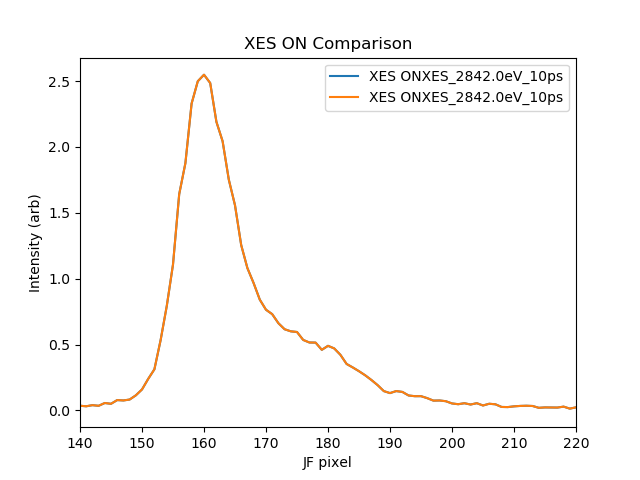

<IPython.core.display.Javascript object>


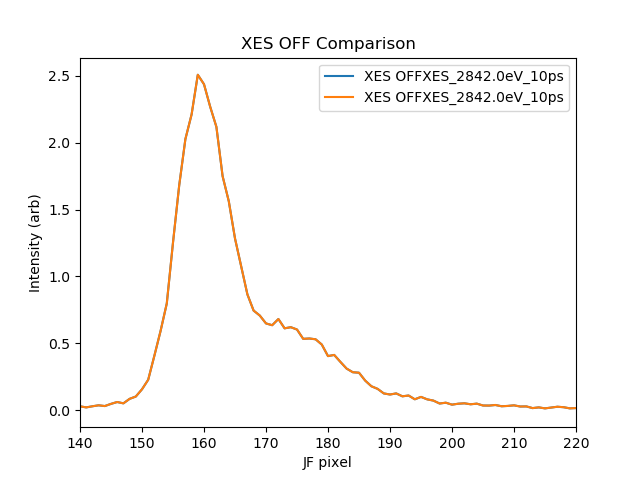

In [8]:
if True:#ynCompare12 == 'yes':

    
    plt.figure()
    plt.plot(xAxis,RIXS_trans_01, label = folder_name_01)
    plt.fill_between(xAxis,RIXS_trans_01+err_trans_01,RIXS_trans_01-err_trans_01,alpha = 0.2)
    plt.plot(xAxis,RIXS_trans_02, label = folder_name_02)
    plt.fill_between(xAxis,RIXS_trans_02+err_trans_02,RIXS_trans_02-err_trans_02,alpha = 0.2)
    plt.xlabel('JF pixel')
    plt.ylabel('Intensity (arb)')
    plt.title('XES transient Comparison')
    plt.legend()
    plt.xlim(xRange_02)
    
    
    plt.figure()
    plt.plot(xAxis,RIXS_on_01, label ='XES ON'+folder_name_01)
    plt.fill_between(xAxis,(RIXS_on_01+err_on_01),(RIXS_on_01-err_on_01), alpha = 0.2)
    plt.plot(xAxis,RIXS_on_02, label ='XES ON'+folder_name_02)
    plt.fill_between(xAxis,(RIXS_on_02+err_on_02),(RIXS_on_02-err_on_02), alpha = 0.2)
    plt.xlabel('JF pixel')
    plt.ylabel('Intensity (arb)')
    plt.title('XES ON Comparison')
    plt.legend()
    plt.xlim(xRange_02)
    
    plt.figure()
    plt.plot(xAxis,RIXS_off_01, label ='XES OFF'+folder_name_01)
    plt.fill_between(xAxis,(RIXS_off_01+err_off_01),(RIXS_off_01-err_off_01), alpha = 0.2)
    plt.plot(xAxis,RIXS_off_02, label ='XES OFF'+folder_name_02)
    plt.fill_between(xAxis,(RIXS_off_02+err_off_02),(RIXS_off_02-err_off_02), alpha = 0.2)
    plt.xlabel('JF pixel')
    plt.ylabel('Intensity (arb)')
    plt.title('XES OFF Comparison')
    plt.legend()
    plt.xlim(xRange_02)

In [9]:
# if False:
#     red_data_file_01 = '/das/work/p17/p17983/Reduced_data/'+ folder_name_01

#     np.save(red_data_file_01+'XES_on',RIXS_on_01)
#     np.save(red_data_file_01+'XES_on_err',err_on_01)
    
#     np.save(red_data_file_01+'XES_off',RIXS_off_01)
#     np.save(red_data_file_01+'XES_off_err',err_off_01)
    
#     np.save(red_data_file_01+'XES_trans',RIXS_trans_01)
#     np.save(red_data_file_01+'XES_trans_err',err_trans_01)
    
# if False:
#     red_data_file_02 = '/das/work/p17/p17983/Reduced_data/'+ folder_name_02
    
#     np.save(red_data_file_02+'XES_on',RIXS_on_02)
#     np.save(red_data_file_02+'XES_on_err',err_on_02)
    
#     np.save(red_data_file_02+'XES_off',RIXS_off_02)
#     np.save(red_data_file_02+'XES_off_err',err_off_02)
    
#     np.save(red_data_file_02+'XES_trans',RIXS_trans_02)
#     np.save(red_data_file_02+'XES_trans_err',err_trans_02)
    
    

    
    


In [1]:
folder_name_01 = 'XES_RuDimerCl_2842.0eV_600fs'
folder_name_01 = 'XES_2842.0eV_10ps'


red_data_file_01 = '/das/work/p17/p17983/Reduced_data/'+ folder_name_01
print(red_data_file_01)

/das/work/p17/p17983/Reduced_data/XES_2842.0eV_10ps
